In [1]:
%reset -f
%matplotlib inline

In [2]:
import pprint
import numpy as np
import pandas as pd
import scipy.io as sio
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
mat = sio.loadmat("data/ex8movies.mat")
pprint.pprint(mat)

{'R': array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec '
               b' 1 17:19:26 2011',
 '__version__': '1.0'}


In [5]:
#y        = [n_movies, n_users] i.e. y[i,j] is rating for movie i by user j 
#is_rated = [n_movies, n_users] i.e. r[i,j] = 1 if user j rated movie i else 0
y        = mat["Y"]
is_rated = mat["R"]

In [6]:
mat = sio.loadmat("data/ex8movies-params.mat")
pprint.pprint(mat)

{'Theta': array([[ 0.28544362, -1.68426509,  0.26293877, ...,  0.76723235,
        -1.10460164, -0.25186708],
       [ 0.50501321, -0.45464846,  0.31746244, ...,  1.09306336,
        -1.20029436, -0.39161676],
       [-0.43191656, -0.47880449,  0.84671111, ...,  1.36333976,
        -0.32523542, -0.19468212],
       ...,
       [ 1.0586926 , -0.8087176 ,  0.56935771, ...,  0.80421422,
        -0.74346778, -0.11985885],
       [ 0.89058932, -0.12894734,  0.35560466, ...,  1.37426807,
        -0.7526549 , -0.81135311],
       [ 0.82414136, -0.38892594,  1.06940502, ...,  1.28423703,
        -0.98349993, -0.53184838]]),
 'X': array([[ 1.0486855 , -0.40023196,  1.19411945, ...,  0.861721  ,
        -0.69728994,  0.28874563],
       [ 0.78085123, -0.38562591,  0.52119779, ...,  0.70402073,
        -0.48583521, -0.56462407],
       [ 0.64150886, -0.54785385, -0.08379638, ...,  0.83854643,
        -0.69483208, -1.13479631],
       ...,
       [ 0.21952237, -0.20047886,  0.09257965, ...,  0.145

In [7]:
#x     = [n_movies, n_features] i.e. x[i,j] is feature j for movie i
#theta = [n_users, n_features] i.e. theta[i,j] is parameter feature j for user i 
x     = mat["X"]
theta = mat["Theta"]

In [8]:
movie_ids = dict()

with open("data/ex8movie-ids.txt") as f:
    for line in f.readlines():
        line = line.strip()
        token = line.split(" ")
        movie_ids[int(token[0]) -1] = " ".join(token[1: ])

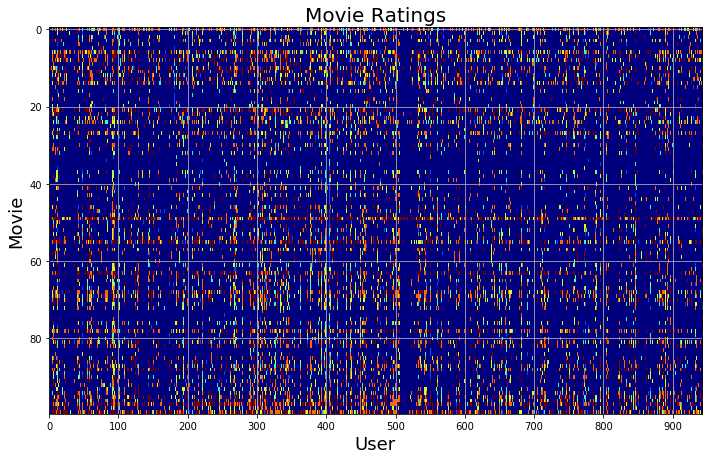

In [9]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.imshow(y[:100,:], cmap = "jet", interpolation = "nearest")
ax.set_title("Movie Ratings", fontsize = 20)
ax.set_xlabel("User", fontsize = 18)
ax.set_ylabel("Movie", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [10]:
#add ratings for new user
ratings = np.zeros((1682, 1))

ratings[0]   = 4.0  
ratings[6]   = 3.0  
ratings[11]  = 5.0  
ratings[53]  = 4.0  
ratings[63]  = 5.0  
ratings[65]  = 3.0  
ratings[68]  = 5.0  
ratings[97]  = 2.0  
ratings[182] = 4.0  
ratings[225] = 5.0  
ratings[354] = 5.0

y        = np.append(y, ratings, axis = 1)  
is_rated = np.append(is_rated, ratings != 0, axis = 1)

In [11]:
model = sbbml.CollaborativeFiltering(
    alpha = 10.0, 
    gamma = 10.0, 
    n_features = 10, 
    iterations = 100
)
opt = model.fit(y, is_rated); opt

     fun: 72300.81038599098
     jac: array([ 2.3541988 , -5.04724689, -0.50223974, ..., -0.89181084,
       -0.35848501, -1.28515054])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 305
     nit: 100
    njev: 305
  status: 1
 success: False
       x: array([0.71332754, 0.44487124, 0.63829748, ..., 0.37957976, 0.56080363,
       0.59148285])

In [12]:
y_pred     = np.dot(model.x, model.theta.T)
y_pred_new = y_pred[:, -1] 
sorted_idx = np.argsort(y_pred_new, axis = 0)[::-1]

pred_movies = list()

for i in range(20):  
    k   = sorted_idx[i]
    tup = {"movie": movie_ids[k], "pred_rating": y_pred_new[k]}
    pred_movies.append(tup)

pd.DataFrame(pred_movies)

,movie,pred_rating
0,Star Wars (1977),4.1208
1,Raiders of the Lost Ark (1981),4.0327
2,Titanic (1997),3.9768
3,Return of the Jedi (1983),3.9519
4,"Empire Strikes Back, The (1980)",3.9061
5,"Shawshank Redemption, The (1994)",3.8951
6,Braveheart (1995),3.8762
7,Terminator 2: Judgment Day (1991),3.7658
8,Good Will Hunting (1997),3.7385
9,"Usual Suspects, The (1995)",3.7290


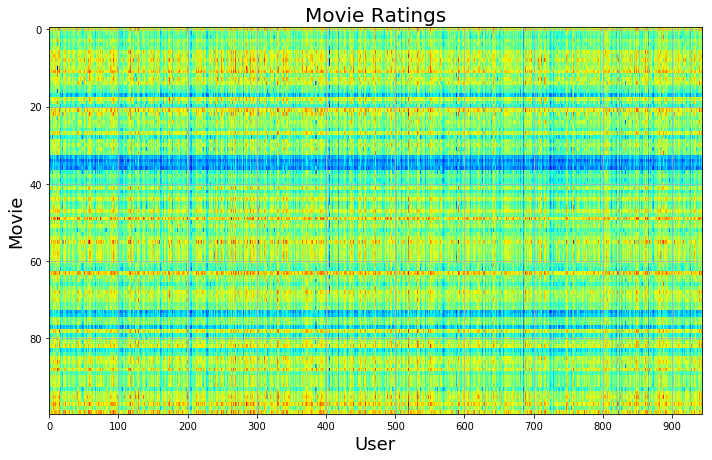

In [13]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.imshow(y_pred[:100,:], cmap = "jet", interpolation = "nearest")
ax.set_title("Movie Ratings", fontsize = 20)
ax.set_xlabel("User", fontsize = 18)
ax.set_ylabel("Movie", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()